### Dependencies

In [17]:
import geopandas as gpd

import pickle
import numpy as np

from matplotlib import pyplot as plt
from kalmanutils import interpolate_geometries, align_vertices

from shapely.geometry import MultiPolygon
import contextily as cx

def calculate_rms(geom1, geom2):
    xy1, xy2 = interpolate_geometries([geom1, geom2], vertex_count=100)
    xy1, xy2 = align_vertices([xy1, xy2])
    return np.sqrt(np.sum((xy1[:,0] - xy2[:,0])**2 + (xy1[:,1] - xy2[:,1])**2)/xy1.shape[0])
    

def calculate_area_diff(geom1, geom2):
    return (geom1.union(geom2) - geom1.intersection(geom2)).area

def plot_geometry(geom, ax, **kwargs):
    if isinstance(geom, MultiPolygon):
        for g in geom.geoms:
            x,y = g.exterior.coords.xy
            ax.plot(x,y, **kwargs)
    else:
        x,y = geom.exterior.coords.xy
        ax.plot(x,y, **kwargs)

# geom = gpd.read_file('/home/jovyan/data/20230517/Run_00013/out_Perimeters.shp')['geometry'][0]
# geom2 = 

In [18]:
import pickle
import numpy as np

from matplotlib import pyplot as plt
from kalmanutils import interpolate_geometries, align_vertices

from shapely.geometry import MultiPolygon
import contextily as cx

def calculate_rms(geom1, geom2):
    xy1, xy2 = interpolate_geometries([geom1, geom2], vertex_count=100)
    xy1, xy2 = align_vertices([xy1, xy2])
    return np.sqrt(np.sum((xy1[:,0] - xy2[:,0])**2 + (xy1[:,1] - xy2[:,1])**2)/xy1.shape[0])
    

def calculate_area_diff(geom1, geom2):
    return (geom1.union(geom2) - geom1.intersection(geom2)).area

def plot_geometry(geom, ax, **kwargs):
    if isinstance(geom, MultiPolygon):
        for g in geom.geoms:
            x,y = g.exterior.coords.xy
            ax.plot(x,y, **kwargs)
    else:
        x,y = geom.exterior.coords.xy
        ax.plot(x,y, **kwargs)
        
def plot_matrix(X, ax, show_stdev = False, **kwargs):
    vcounts = X.shape[0]//2
    
    color = (1,0,0,0.9)
    if 'color' in kwargs:
        color = kwargs['color']
        
    X_std = np.std(X, axis=1)
    X_mean = np.mean(X, axis=1)
    ax.plot(X_mean[::2], X_mean[1::2], **kwargs)

    # Calculate standard deviation of the generated coordinates
    x0, y0 = X_mean[::2], X_mean[1::2]
    radstd = np.zeros_like(x0)
    
    for vix in range(vcounts):
        x,y = X[2*vix,:], X[2*vix+1,:]
        radius = np.sqrt((x-x0[vix])**2 +(y-y0[vix])**2)
        radstd[vix] = np.std(radius)
    
    if show_stdev:
        for vix in range(vcounts):
            circle = plt.Circle((x0[vix], y0[vix]), radius=radstd[vix], fill=False, edgecolor=(0,0,0,0.4), lw=0.3)
            ax.add_artist(circle)


with open('/home/jovyan/data/output_05162023.pkl', 'rb') as f:
    data = pickle.load(f)
    

In [19]:
gdfignition = data['gdfignition']
gdfignition['objectid'] = gdfignition['objectid'].astype(str)

In [25]:
referenceidx_lst = ['f23196b034474744bdca7df94b13e0f7',
 '91d836d082ea402db51aa2ac60e7e010',
 'd8126fed8fee4ae995ca16cf80ad6ee4',
 'daa51871e2dc44a9a13e8e6a84bca95f',
 '07a03e7eb3574a08b70e5118ff278d41',
 '2bca61b14d324d59b13a046dca5ef91f',
 '87681b229d884599a82db4cb0d43c0d8',
 '9a64c889b4b94d72813d286af37369ec',
 'ccc641cdfae34787803447685200f054',
 '34af46c10ff542fdb9701a8d69fe8464',
 '9efae47339cf4956bd1dea10aa95b4dc',
 'b9634835c80f49e2baf5f341d7f18d46',
 'a7da6763e37347608015751c754248b2',
 '59cedb74aac645b486f0c2c25e4d1a9c',
 'f9040f89dc31486db48e69fa8f3ca446',
 '122bb6cdcc954b3093c124862cb22091',
 '0270d4896af64f9b80f0b9a3d39383ad',
 'a3c4edd1eed14ae78e18595b68c651c2',
 '9277d610c32a49b4bfeb51926fc9ac70',
 'cbb2196054b547f2b55d0650721ca5fe',
 '1990ba1b76294bd28073d6ad53c8b031',
 'ee4587df19cc44128574c5fc347b0e06',
 '1bf6b0d97cb54be0b877e66d998c5dd2',
 'fd436f624e304f17a772095543ed310f',
 'a788eafa60d44b92a27ca8fc89ab95c9']

deviateidx_lst = ['f23196b034474744bdca7df94b13e0f7',
 '429543fe775b40c0a9440ccd0834e8e1',
 '8feca9f31cf4428b962e712e3c491080',
 '2abcb5c58b8b438a833d04f596f88814',
 '97d0dc849b234537827b6660799ec803',
 '767363ca857e462aa37d6983dcac0566',
 '70d73ec4c4ee4502bcec3845b354add6',
 'dd15051becea490aa6caa51b7295bc57',
 '0c2923c0d09045a6b0c34da003b09ffa',
 'b7aa9f9817f74b4193637d46160e9d4f',
 '556921c91abb47ab84dd0bf8175a90f3',
 '56ae366614994315b494f3985e44e8d4',
 'c246103ba5a14717b8c56463880a2c08',
 'ed167a94bb754a2f8ffc5de87510e37c',
 '55c7cdfd6894453ebe5cbfeade0e595e',
 '31cfc498c0d3465991736ced5c3d3c2d',
 '1c8875c039424b84bac504e9e065923b',
 '83dacaab390243dbbebe57ca72f7e2ff',
 '849ff167dea24f59b1a2dc4bde8fc932',
 'a88b883fc4d24208a3a7069c8fb24734',
 '1d9ce1fd8d1248dbbb9b369916d6b716',
 '3e9e56885bcc4ff8a812bd2d8c6d54fa',
 '5f0661bcebdb44d297534000c2adf8e4',
 'abd4dd917a5a44c2bd67df72ee558dc7',
 '5b7fb26cb0404eda92b934a5a4d2cd8a']

In [26]:
gdfreference = gdfignition.loc[referenceidx_lst]
gdfdeviate = gdfignition.loc[deviateidx_lst]
gdfupdate = gdfignition[gdfignition['objectid'].str.contains('Update')]

(1500598.4375278142, 1508168.8614191345)

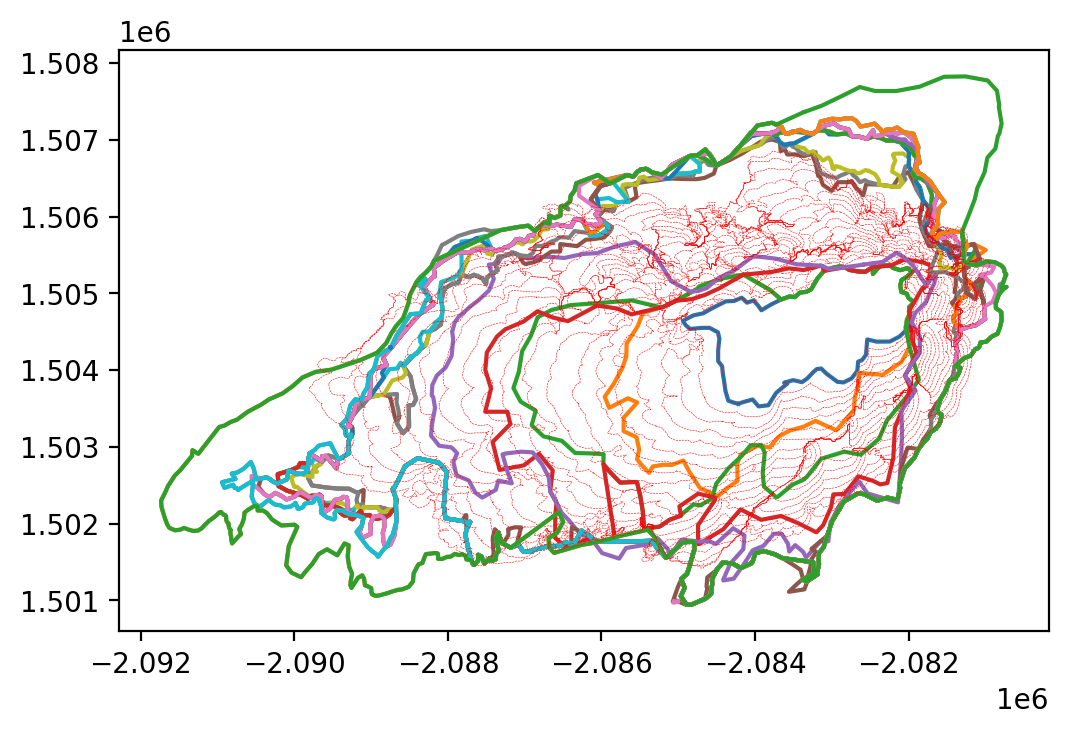

In [27]:
gdfmaria_aircraft = gdfignition.iloc[:20]

fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=200)


alpha_offset = 1/5
for i, (gdfix, gdfrow) in enumerate(gdfmaria_aircraft.iterrows()):
    plot_geometry(geom=gdfrow['geometry'], ax=ax)
    plot_geometry(geom=gdfreference.iloc[i]['geometry'], ax=ax, color=(1,0,0), ls='--', lw=0.2)
    
ax.set_aspect('equal')
ax.set_xlim((-2092286.5426307796, -2080173.4025845625))
ax.set_ylim((1500598.4375278142, 1508168.8614191345))

# cx.add_basemap(ax, crs=gdfreference.crs.to_string())

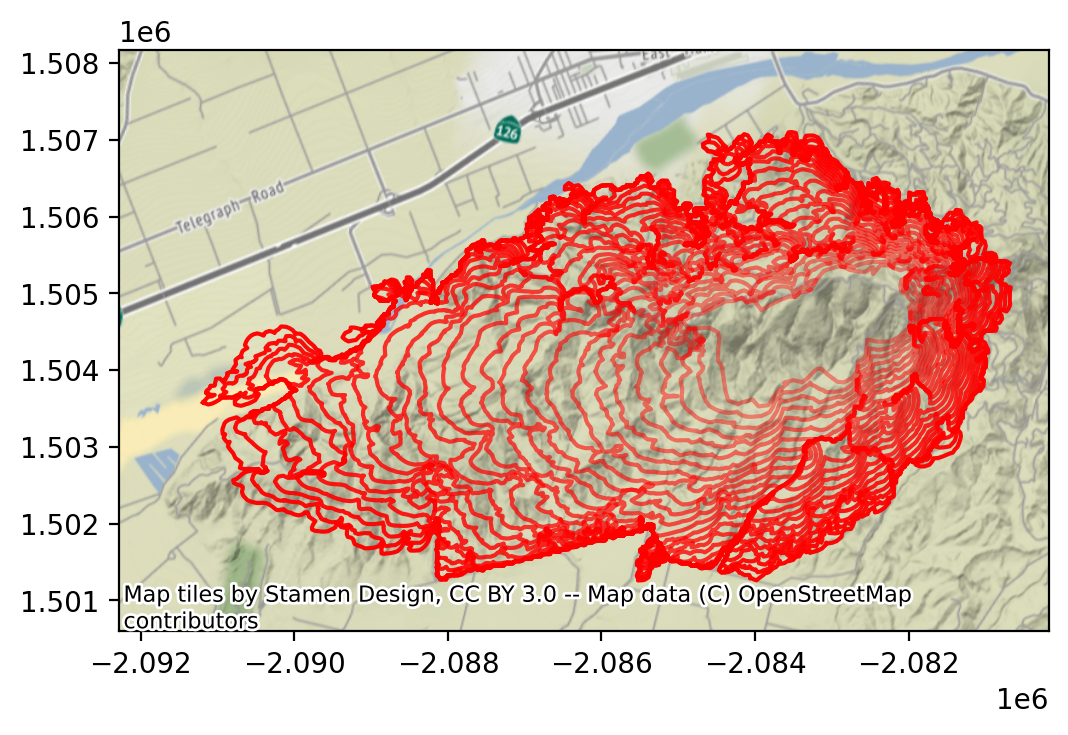

In [28]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=200)

alpha_offset = 0.4
for i, (gdfix, gdfrefrow) in enumerate(gdfreference.iterrows()):
    plot_geometry(geom=gdfrefrow['geometry'], ax=ax, color=(1,0,0,alpha_offset+i*(1-alpha_offset)/len(gdfreference)))
    
    

ax.set_xlim((-2092286.5426307796, -2080173.4025845625))
ax.set_ylim((1500598.4375278142, 1508168.8614191345))

cx.add_basemap(ax, crs=gdfreference.crs.to_string())

### Plot of reference and deviation

(1500598.4375278142, 1508168.8614191345)

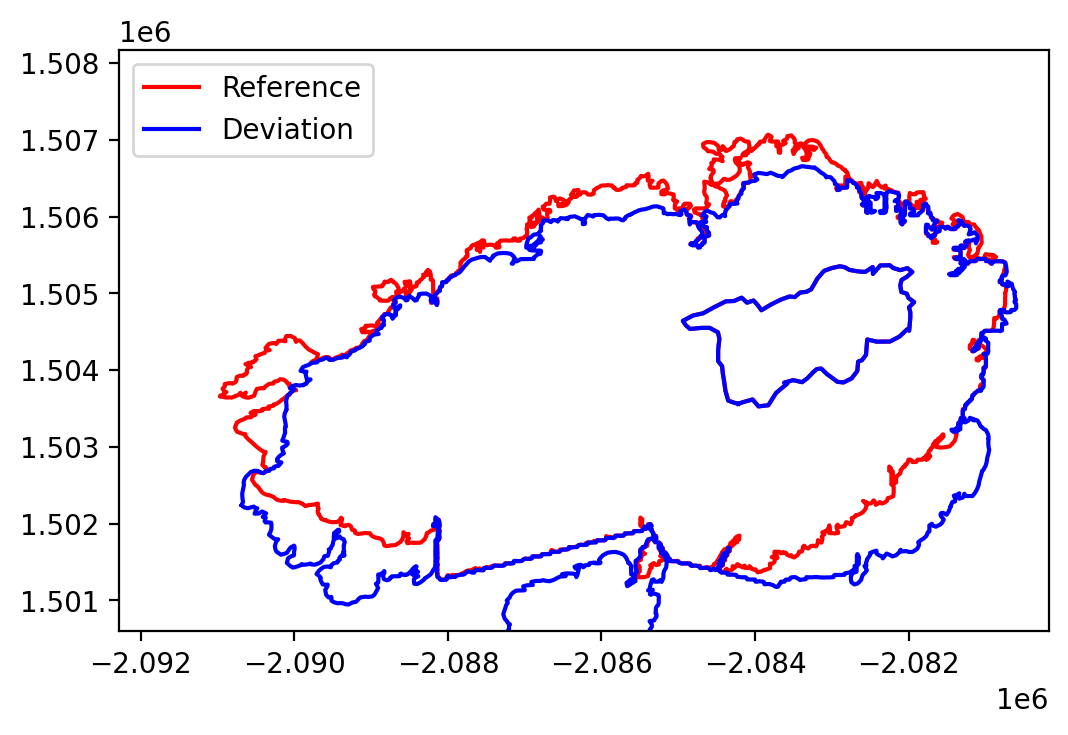

In [33]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=200)


plot_geometry(gdfmaria_aircraft.iloc[0]['geometry'], ax=ax, color=(1,0,0))
plot_geometry(gdfdeviate.iloc[0]['geometry'], ax=ax, color=(0,0,1))

plot_geometry(gdfreference.iloc[-2]['geometry'], ax=ax, color=(1,0,0))
plot_geometry(gdfdeviate.iloc[-1]['geometry'], ax=ax, color=(0,0,1))
# for i in range(1,2):
#     plot_geometry(gdfreference.iloc[i-1]['geometry'], ax=ax, color=(1,0,0), label='Reference')
#     plot_geometry(gdfdeviate.iloc[i]['geometry'], ax=ax, color=(0,0,1), label='Deviation')

ax.legend(['Reference', 'Deviation'])
ax.set_aspect('equal')
ax.set_xlim((-2092286.5426307796, -2080173.4025845625))
ax.set_ylim((1500598.4375278142, 1508168.8614191345))

# cx.add_basemap(ax, crs=gdfmaria_aircraft.crs.to_string(), source=cx.providers.CartoDB.Positron)

In [30]:
gdfmaria_aircraft.crs.to_string()

'EPSG:5070'

Text(0.5, 1.0, 'Error comparison')

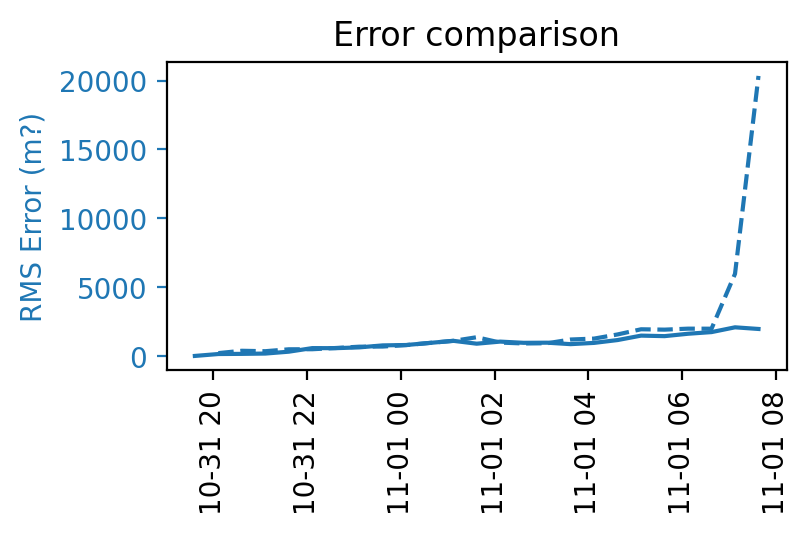

In [32]:
errors_rms = []
errors_areadiff = []
for (geom1, geom2) in zip(gdfreference['geometry'].tolist(), gdfdeviate['geometry'].tolist()):
    errors_rms.append(calculate_rms(geom1, geom2))
    errors_areadiff.append(calculate_area_diff(geom1, geom2))

errors_rms_update = []
errors_areadiff_update = []
for (geom1, geom2) in zip(gdfreference['geometry'].tolist(), gdfupdate['geometry'].tolist()):
    errors_rms_update.append(calculate_rms(geom1, geom2))
    errors_areadiff_update.append(calculate_area_diff(geom1, geom2))

    
fig, ax = plt.subplots(1,1, figsize=(4,2), dpi=200)
# ax2 = ax.twinx()

ax.plot(gdfreference['datetime'], errors_rms, color='tab:blue')
ax.plot(gdfupdate['datetime'], errors_rms_update, color='tab:blue', ls='--')
# ax.set_ylim(0,2000)
ax.set_ylabel('RMS Error (m?)', color='tab:blue')
ax.tick_params(axis='y', colors='tab:blue')
# ax2.spines['left'].set_color('tab:blue')

# ax2.plot(gdfreference['datetime'], errors_areadiff, color='tab:orange')
# ax2.plot(gdfupdate['datetime'], errors_areadiff_update, color='tab:orange', ls='--')
# ax2.set_ylim(0,1e7)
# ax2.set_ylabel('Area Difference', color='tab:orange')
# ax2.tick_params(axis='y', colors='tab:orange')
# ax2.spines['right'].set_color('tab:orange')
# ax2.yaxis.set_ticklabels(ax2.yaxis.get_ticklabels(), color='tab:orange')


ax.xaxis.set_tick_params(rotation=90)

ax.set_title('Error comparison')


In [21]:
gdfreference

,filetype,objectid,filepath,datetime,description,geometry
51fdaebe31f44ad69272779a3f01182d,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00000/out_Perim...,2019-10-31 20:07:11,Maria2019,"POLYGON ((-2084574.000 1504835.000, -2084554.0..."
68b265e5ba78410d9ba23e595c4ebe4d,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00001/out_Perim...,2019-10-31 20:37:11,Maria2019,"POLYGON ((-2085015.000 1504756.000, -2085025.0..."
aab698d3dcdb40c5a200fa962062eac6,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00002/out_Perim...,2019-10-31 21:07:11,Maria2019,"POLYGON ((-2085197.000 1504021.000, -2085201.0..."
898b0f9313d44e70bfe3fd53a269981f,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00003/out_Perim...,2019-10-31 21:37:11,Maria2019,"POLYGON ((-2085149.000 1504474.000, -2085139.0..."
f812b5bd6b9841c7a9d3c049f2ef65d0,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00004/out_Perim...,2019-10-31 22:07:11,Maria2019,"POLYGON ((-2085749.000 1504157.000, -2085717.0..."
1902f9bb87654d6596616ce39baa5bd4,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00005/out_Perim...,2019-10-31 22:37:11,Maria2019,"POLYGON ((-2085846.000 1504355.000, -2085870.0..."
8a431825f5ed4c80a5c8bbe6272aae75,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00006/out_Perim...,2019-10-31 23:07:11,Maria2019,"POLYGON ((-2085917.000 1504477.000, -2085917.0..."
eaf6ac2e01c14ee6a7575004cc255470,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00007/out_Perim...,2019-10-31 23:37:11,Maria2019,"POLYGON ((-2087673.000 1503303.000, -2087676.0..."
2a2d3f9489a34a5ebe7acb1842be28b9,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00008/out_Perim...,2019-11-01 00:07:11,Maria2019,"POLYGON ((-2088382.000 1503008.000, -2088380.0..."
a966c3e028054453ae6ae791bdbb2eaa,Ignition,21231_RefTruth,/home/jovyan/data/20230203/Run_00009/out_Perim...,2019-11-01 00:37:11,Maria2019,"POLYGON ((-2088359.000 1503673.000, -2088332.0..."


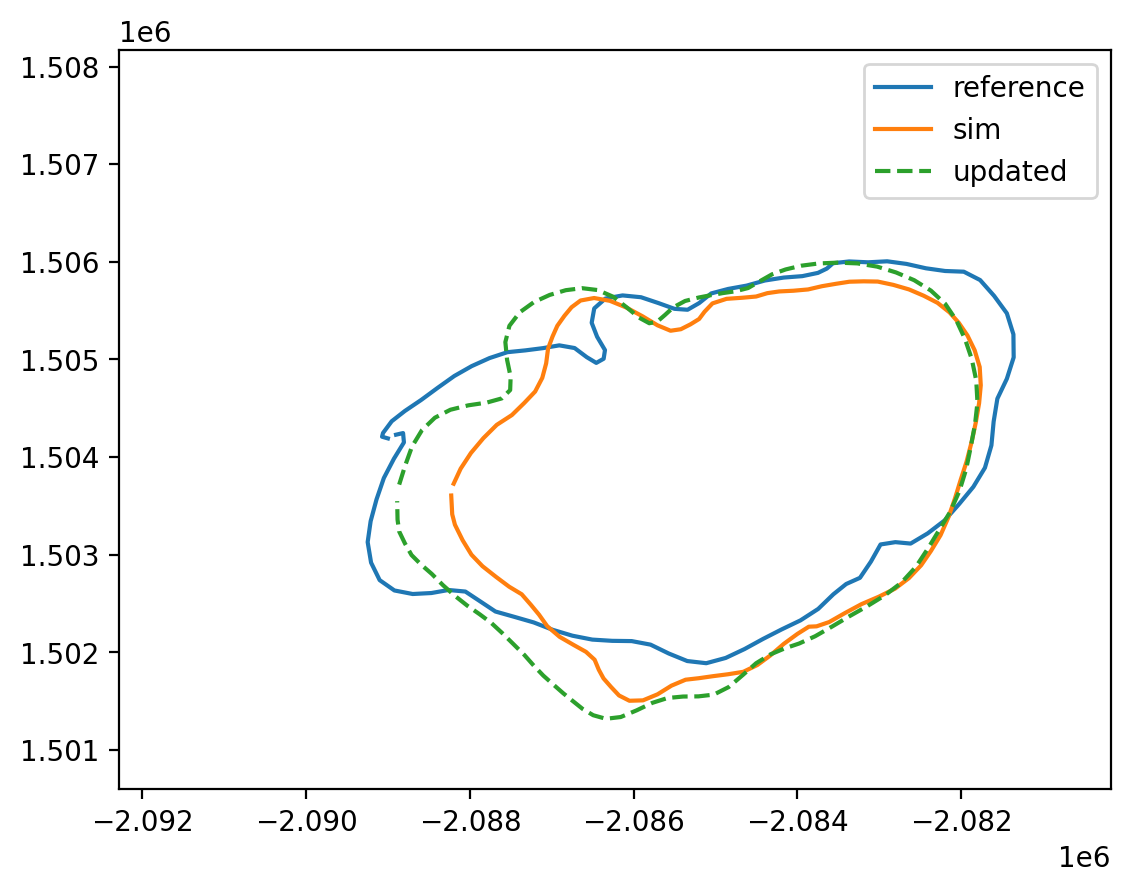

In [80]:
fig, ax = plt.subplots(1,1, dpi=200)
plotix = 11

plot_matrix(data['calculations'][plotix]['Y'], ax=ax, label='reference')
plot_matrix(data['calculations'][plotix]['Xt'][:-2,:], ax=ax, label='sim')
plot_matrix(data['calculations'][plotix]['X'][:-2,:], ax=ax, label='updated', ls='--')

ax.set_xlim((-2092286.5426307796, -2080173.4025845625))
ax.set_ylim((1500598.4375278142, 1508168.8614191345))
ax.legend()
